# PreProcessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import seaborn as sns
plt.style.use("seaborn")

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1080 non-null   int64  
 1   Label   1080 non-null   object 
 2   Rank    1080 non-null   int64  
 3   Id      1080 non-null   float64
 4   Text    1080 non-null   object 
 5   Image   1080 non-null   object 
 6   Title   1080 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 59.2+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Real and Fake News Instances')

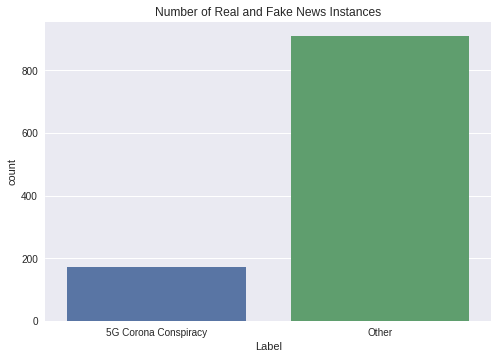

In [ ]:
#####################################################         Reading CSV        #################################################

from google.colab import drive
drive.mount('/content/drive')


PATH = os.getcwd()
DATADIR = PATH + '/drive/My Drive/Ds/Binarymedia.csv'
df = pd.read_csv(DATADIR,delimiter=',',encoding='latin-1')

df.info()
sns.countplot(df.Label)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')

In [ ]:
df.head()
df['Label'].value_counts()
#df['main_img_url'].value_counts()
df.head()

,Index,Label,Rank,Id,Text,Image,Title
0,1,5G Corona Conspiracy,1,1.250000e+18,Conspiracy theories online suggest #5G #techno...,https://pbs.twimg.com/media/EVHIrhKVAAAM78b.jpg,Conspiracy theories online suggest #5G #techno...
1,2,5G Corona Conspiracy,1,1.250000e+18,@Placebo90511492 bro\n. check out the promoted...,https://pbs.twimg.com/media/EVGi5PeU8AAmmpi.jpg,@Placebo90511492 bro\n. check out the promoted...
2,3,5G Corona Conspiracy,1,1.250000e+18,the majority of covid-19 deaths have occured o...,https://pbs.twimg.com/media/EVcVrwgXsAEXepN.jpg,the majority of covid-19 deaths have occured o...
3,4,5G Corona Conspiracy,1,1.240000e+18,David David is inviting you to a scheduled Zoo...,https://pbs.twimg.com/media/EUE5yRwXkAUWVkc.png,David David is inviting you to a scheduled Zoo...
4,5,5G Corona Conspiracy,1,1.240000e+18,Derrick Broze of The Conscious Resistance join...,https://pbs.twimg.com/media/ESdGE4KWsAQXp-p.jpg,Derrick Broze of The Conscious Resistance join...


In [ ]:
data = df[["Label","Text","Title","Image"]]
print(data['Label'].value_counts())
data.columns

Other                   909
5G Corona Conspiracy    171
Name: Label, dtype: int64


Index(['Label', 'Text', 'Title', 'Image'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1080 non-null   object
 1   Text    1080 non-null   object
 2   Title   1080 non-null   object
 3   Image   1080 non-null   object
dtypes: object(4)
memory usage: 33.9+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Other                   909
5G Corona Conspiracy    171
Name: Label, dtype: int64

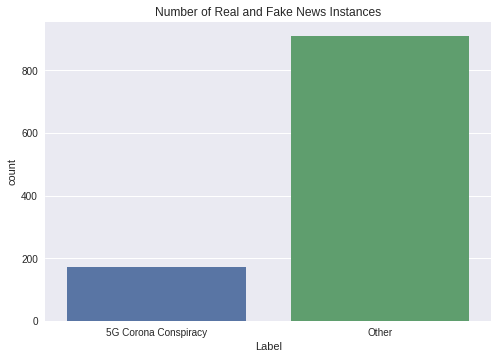

In [ ]:
data.info()
sns.countplot(data.Label)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')
data.Label.value_counts()

In [ ]:
CATEGORIES = ['5G Corona Conspiracy', 'Other']
LENDIR=len(CATEGORIES)

IMG_SIZE = 128
#############################################################      Reading Image URL       ########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils
from matplotlib import pyplot as plt

x=0
for i, j in data.iterrows(): 
  link=j["Label"]
  print(link)
  if(x%500==0):
    print(x)
  try:
    img_array = imutils.url_to_image(link)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    cv2_imshow(new_array)
    x=x+1
    print(new_array.shape)
  except Exception as e:  # in the interest in keeping the output clean... 
    #data.drop(data[ data['main_img_url'] == link ].index, inplace = True)
    print('2')
    pass
    #print(i,j)
  if(x==5): 
    break;   #.....show only one

IMG_SIZE = 128


5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2
5G Corona Conspiracy
0
2


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(drop=True, inplace=True)

In [ ]:
#################################################################    Lables Encoding    #######################################################
labelencoder = LabelEncoder()
#for i,j in data.iterrows():
  #j['type'] = labelencoder.fit_transform(j['type'])
Y = data.Label
Y = labelencoder.fit_transform(Y)

In [ ]:
print(len(Y))
print(Y[:5])

1080
[1 0 1 1 1]


In [ ]:
##############################################################    Reading and Preprocessing Images       ###########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils

training_data_img = []

IMG_SIZE = 128

def create_training_data():
 
  x=0
  for i, j in data.iterrows(): 
    
    link=j['Image']
    #print(link)
    if(x%500==0):
      print(x)

    try:
      #img_array=io.imread(link);
      img_array = imutils.url_to_image(link)
      
      new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))

      x=x+1
      training_data_img.append([new_array,Y[i]])
      #print('1')
    except Exception as e:  # in the interest in keeping the output clean... 
      data.drop(data[ data['Image'] == link ].index, inplace = True)
      print('2')
      pass
      #print(i,j) 
 
create_training_data()
 
print(len(training_data_img))

0
2
2
2
2
2
2
2
2
2
2
2
2
2
500
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1000
2
1052


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1052 non-null   object
 1   Text    1052 non-null   object
 2   Title   1052 non-null   object
 3   Image   1052 non-null   object
dtypes: object(4)
memory usage: 41.1+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Other                   888
5G Corona Conspiracy    164
Name: Label, dtype: int64

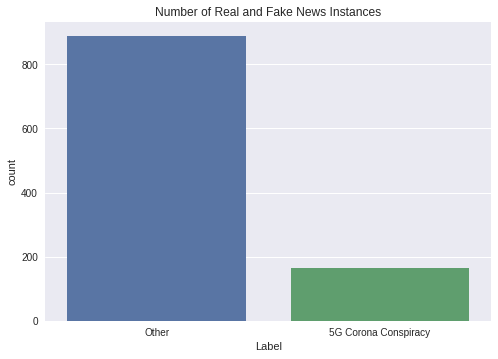

In [ ]:
data.info()
sns.countplot(data.Label)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')
data.Label.value_counts()

In [ ]:
print(type(training_data_img))
print(np.array(training_data_img).shape)
print(len(data))
#print(training_data_img[0])
print(len(training_data_img[0][0]))
print(len(training_data_img[0][0][0]))

<class 'list'>
(1052, 2)
1052
128
128


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
from pickle import dump, load
# save the scaler
dump(training_data_img, open('training_data_img.pkl', 'wb'))


In [ ]:
# load the scaler
training_data_img = load(open('training_data_img.pkl', 'rb'))

print(len(training_data_img))
print(type(training_data_img))

print(np.array(training_data_img).shape)

print(len(training_data_img[0][0]))
print(len(training_data_img[0][0][0]))

1052
<class 'list'>
(1052, 2)
128
128


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [ ]:
X_img = []
labels = []
IMG_SIZE = 128

for features,label in training_data_img:
    X_img.append(features)
    labels.append(label)

X_img = np.array(X_img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

X_img = X_img/255.0
print(type(X_img))
print((X_img).shape)
print(len(training_data_img))
#print(X_img[0])

############################################################################################      Image Preprocessing done     #########################################################################

<class 'numpy.ndarray'>
(1052, 128, 128, 3)
1052


In [ ]:
train_df = data.Text
print(train_df[0])
train_df = train_df.astype(str)
print(train_df[0])
print(len(data.Text))

Stark images out of the northern region of Antarctica reveal a barren landscape nearly devoid of snow and ice following record-setting temperatures last week. https://t.co/lIVT9r6E90 https://t.co/JRcTzGJZCh
Stark images out of the northern region of Antarctica reveal a barren landscape nearly devoid of snow and ice following record-setting temperatures last week. https://t.co/lIVT9r6E90 https://t.co/JRcTzGJZCh
1052


In [ ]:
#############################################################################################      Reading and preprocessing Text       ##################################################################################
# import warnings
# warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  
import pandas as pd                                 
import nltk       
import gensim                                  

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from gensim.models import Word2Vec                                   #For Word2Vec

X_text = data.Text

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_text = X_text.astype(str)

########################################
## process texts in datasets
########################################
print('Processing text dataset')
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
from string import punctuation, ascii_lowercase
import regex as re
from tqdm import tqdm

# replace urls
re_url = re.compile(r"((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\
                    .([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*",
                    re.MULTILINE|re.UNICODE)
# replace ips
re_ip = re.compile("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}")

# setup tokenizer
tokenizer = WordPunctTokenizer()

vocab = Counter()

def text_to_wordlist(text, lower=False):
    # replace URLs
    text = re_url.sub("URL", text)
    
    # replace IPs
    text = re_ip.sub("IPADDRESS", text)
    
    # Tokenize
    text = tokenizer.tokenize(text)
    
    # optional: lower case
    if lower:
        text = [t.lower() for t in text]
    
    # Return a list of words
    vocab.update(text)
    return text

def process_comments(list_sentences, lower=False):
    comments = []
    for text in tqdm(list_sentences):
        txt = text_to_wordlist(text, lower=lower)
        comments.append(txt)
    return comments

                
comments_text = process_comments(X_text, lower=True)

print(comments_text[0])

100%|██████████| 1052/1052 [00:00<00:00, 20396.84it/s]

Processing text dataset
['stark', 'images', 'out', 'of', 'the', 'northern', 'region', 'of', 'antarctica', 'reveal', 'a', 'barren', 'landscape', 'nearly', 'devoid', 'of', 'snow', 'and', 'ice', 'following', 'record', '-', 'setting', 'temperatures', 'last', 'week', '.', 'https', '://', 't', '.', 'co', '/', 'livt9r6e90', 'https', '://', 't', '.', 'co', '/', 'jrctzgjzch']


In [ ]:
################################################     1.  Remove stopwords         ######################################################
nltk.download("stopwords")
stop = set(stopwords.words('english')) 
print(stop)
print(len(X_text))
print(X_text.shape)
print(X_text.head())
print(type(X_text))

X_text_copy = X_text

import re               
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in tqdm(X_text_copy):
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
    temp.append(words)
    
X_text_copy = temp    

print(X_text_copy[0])


  0%|          | 0/1052 [00:00<?, ?it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'to', 'shouldn', 'below', "she's", "that'll", 'on', 'himself', 'your', "you're", "haven't", 'how', 'same', "it's", 'you', 'her', 'these', 'above', 'any', 'y', "aren't", "wouldn't", 'it', 'most', "won't", 'while', 'then', 'who', 'was', 'him', 'they', 'which', 'haven', 'needn', 'at', 'against', 'their', 'she', 'doing', 'own', "you'd", 'have', 'his', 'into', 'down', 'were', 'd', 'until', 'we', 'very', 'having', 'herself', 'once', "couldn't", 'as', 'out', 'being', 'nor', 'll', 'hers', 'all', 'them', 'isn', 'now', 'where', 'by', 've', 'yours', 'up', 'each', 'will', 'i', 'and', 'don', 'o', 'my', "hadn't", 'be', "weren't", 'if', "didn't", 'wouldn', 'did', 'too', 'ourselves', "you'll", 'before', 'here', "needn't", 'shan', "mightn't", 'just', 'weren', 'over', 'more', 're', 'other', 'does', 'further', 'ma', 'been', 'after', 'had', 'should', 'our', 'themselves', 'theirs', 'than', 'yours

100%|██████████| 1052/1052 [00:04<00:00, 214.49it/s]

['stark', 'imag', 'northern', 'region', 'antarctica', 'reveal', 'barren', 'landscap', 'near', 'devoid', 'snow', 'ice', 'follow', 'record-set', 'temperatur', 'last', 'week', 'https:', 'co', 'livt9r6e90', 'https:', 'co', 'jrctzgjzch']


In [ ]:
print(len(comments_text))
print(len(X_text_copy))
print(np.array(comments_text).shape)
print(np.array(X_text_copy).shape)
print(len(comments_text[0]))
print(len(X_text_copy[0]))

print("The vocabulary contains {} unique tokens".format(len(vocab)))

1052
1052
(1052,)
(1052,)
41
23
The vocabulary contains 9653 unique tokens


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
############################################     2.   Preparing Word vectors from Word2vec      #################################################
comments_backup = comments_text
comments_text = X_text_copy

import gensim
from gensim.models import Word2Vec
model_text = Word2Vec(comments_backup, size=100, window=5, min_count=5, workers=16, sg=0, negative=5)
word_vectors = model_text.wv
print("Number of word vectors: {}".format(len(word_vectors.vocab)))         ##

model_text.wv.most_similar_cosmul(positive=['corona', 'covid'], negative=['cure'])   #### Example

Number of word vectors: 1122


[('yourself', 1.0170178413391113),
 ('of', 1.0169315338134766),
 (',', 1.0168031454086304),
 ('ignorant', 1.0162944793701172),
 ('highest', 1.0160173177719116),
 ('aka', 1.015891194343567),
 ('19', 1.0156031847000122),
 ('party', 1.0149509906768799),
 ('studies', 1.0148345232009888),
 ('turn', 1.0144472122192383)]

In [ ]:
print(comments_backup[0])

['stark', 'images', 'out', 'of', 'the', 'northern', 'region', 'of', 'antarctica', 'reveal', 'a', 'barren', 'landscape', 'nearly', 'devoid', 'of', 'snow', 'and', 'ice', 'following', 'record', '-', 'setting', 'temperatures', 'last', 'week', '.', 'https', '://', 't', '.', 'co', '/', 'livt9r6e90', 'https', '://', 't', '.', 'co', '/', 'jrctzgjzch']


In [ ]:
############################################      3.   Prepare sequence matrix from vocab         ###############################################
MAX_NB_WORDS = len(word_vectors.vocab)
MAX_SEQUENCE_LENGTH = 200

from keras.preprocessing.sequence import pad_sequences

word_index = {t[0]: i+1 for i,t in enumerate(vocab.most_common(MAX_NB_WORDS))}    ##
sequences_text = [[word_index.get(t, 0) for t in comment]
             for comment in comments_backup[:len(X_text)]]  ##

# pad
training_data_text = pad_sequences(sequences_text, maxlen=MAX_SEQUENCE_LENGTH,    
                     padding="pre", truncating="post")     ##
# list_classes = ["real", "fake"]
# y = train_df[list_classes].values
y = np.array(labels)
print('Shape of data tensor:', training_data_text.shape)
print('Shape of label tensor:', y.shape)

# test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
#                           truncating="post")
# print('Shape of test_data tensor:', test_data.shape)

#print(training_data_text[0])

Shape of data tensor: (1052, 200)
Shape of label tensor: (1052,)


In [ ]:
##########################################        4.   Prepare Text embedding vector for embedding layer in Bi-LSTM    #################################
WV_DIM = 100
nb_words_text = min(MAX_NB_WORDS, len(word_vectors.vocab))          ##
# we initialize the matrix with random numbers
wv_matrix_text = (np.random.rand(nb_words_text, WV_DIM) - 0.5) / 5.0     ##
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        # words not found in embedding index will be all-zeros.
        wv_matrix_text[i] = embedding_vector
    except:
        pass      

In [ ]:
print(type(training_data_text))
training_data_text = np.array(training_data_text)
print(type(training_data_text))
print((training_data_text).shape)
print(len(training_data_text))
print(training_data_text[0])

######################################################################################       Text Preprocessing ends    #########################################################################################

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1052, 200)
1052
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  79
  12   2   0   0  12   0   0  16   0   0   0   0  12   0  14   0 341 780
  18   0   0 256 492   1   8   7   3   1   6   5   0   8   7   3   1   6
   5   0]


In [ ]:
##################################################################################      Reading and preprocessing Title      ##############################################################################
import numpy as np                                  
import pandas as pd                                 
import nltk       
import gensim                                  

X_title = data.Title

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_title = X_title.astype(str)

comments_title = X_title
###################   1. Tokenisation  #########################
from keras.preprocessing.text import Tokenizer
max_words = 1000
max_len = 300
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(comments_title)
sequences_2 = tok.texts_to_sequences(comments_title) ###### name training_data_title
training_data_title = sequence.pad_sequences(sequences_2,maxlen=max_len)


print(type(training_data_title))
training_data_title = np.array(training_data_title)
print(type(training_data_title))
print((training_data_title).shape)
print(len(training_data_title))
print(training_data_title[0])

###########################################################################################         Title Preprocessing Ends          ################################################################################

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1052, 300)
1052
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
print(comments_title[0])

Stark images out of the northern region of Antarctica reveal a barren landscape nearly devoid of snow and ice following record-setting temperatures last week. https://t.co/lIVT9r6E90 https://t.co/JRcTzGJZCh


In [ ]:
#####################################################################################        Final Train and Test set             ##########################################################################

fin_X = []

total_data = len(training_data_text)
for i in range(len(data)):
  fin_X.append([X_img[i], training_data_text[i], training_data_title[i]])


print(len(fin_X))
print(np.array(fin_X).shape)
print(labels[0:5])
# print(fin_X[0])

1052
(1052, 3)
[1, 0, 1, 1, 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
print(type(fin_X))
print(np.array(fin_X[0]).shape)
print(len(fin_X))
print(fin_X[0][0])
print("Hello")
print(fin_X[0][1])
print("Hello")
print(fin_X[0][2])
# print("Hello")
# print(fin_X[0][1])
# print("Hello")
# print(fin_X[0][2])

<class 'list'>
(3,)
1052
[[[0.78039216 0.69803922 0.66666667]
  [0.78039216 0.70196078 0.65882353]
  [0.77254902 0.70196078 0.65882353]
  ...
  [0.83529412 0.77647059 0.74117647]
  [0.83137255 0.77254902 0.7372549 ]
  [0.81568627 0.76470588 0.73333333]]

 [[0.76470588 0.68235294 0.65098039]
  [0.76862745 0.69019608 0.64705882]
  [0.77254902 0.69411765 0.65098039]
  ...
  [0.82745098 0.78039216 0.74117647]
  [0.83921569 0.79215686 0.75294118]
  [0.83529412 0.78431373 0.75294118]]

 [[0.76862745 0.68235294 0.63529412]
  [0.77254902 0.68235294 0.63529412]
  [0.77254902 0.69803922 0.64705882]
  ...
  [0.94117647 0.91372549 0.90196078]
  [0.90980392 0.86666667 0.84313725]
  [0.90980392 0.87058824 0.85882353]]

 ...

 [[0.41568627 0.39215686 0.34901961]
  [0.41568627 0.39215686 0.34901961]
  [0.42352941 0.4        0.35686275]
  ...
  [0.48235294 0.45882353 0.41568627]
  [0.49019608 0.45490196 0.41568627]
  [0.48627451 0.4627451  0.41960784]]

 [[0.41568627 0.39215686 0.34901961]
  [0.4078431

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
###########################################################################################     Splitting final set to train and test     ###########################################################

from sklearn.model_selection import train_test_split
X_train_val,X_test,Y_train_val,Y_test = train_test_split(fin_X,labels,test_size=0.20)


In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.25)


In [ ]:
print("<-------X_train------>")
print(type(X_train))
print(np.array(X_train).shape)
print(np.array(X_train[0]).shape)
print(np.array(X_train[0][0]).shape)
print(np.array(X_train[0][1]).shape)
print(len(X_train))
print(type(X_train))
print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][1]))
print("<-------Y_train------>")
print(type(Y_train))
print(type(Y_train[0]))
print((Y_train[0]))
print("<-------X_test------>")
print(type(X_test[0][0]))
print("<-------Y_test------>")
print(type(Y_test))
print(np.array(Y_train).shape)
print(len(Y_train))

print(type(X_train_val))
print(type(X_train))
print(type(X_val))
print(type(X_test))
print("\n")

print(len(X_train_val))
print(len(X_train))
print(len(X_val))
print(len(X_test))

<-------X_train------>
<class 'list'>
(630, 3)
(3,)
(128, 128, 3)
(200,)
630
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<-------Y_train------>
<class 'list'>
<class 'numpy.int64'>
0
<-------X_test------>
<class 'numpy.ndarray'>
<-------Y_test------>
<class 'list'>
(630,)
630
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


841
630
211
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
#<-------------------------------------------------------------------------------------    IMAGE CLASSIFIER   ------------------------------------------------------------------------------------------------>

In [ ]:
################################################################     Extracting image data from final train and test dataset     #######################################
X_train_img = []
X_test_img = []
X_val_img = []

for i in range(len(X_train)):
  temp1 = X_train[i][0].tolist()
  X_train_img.append(temp1)
  
for i in range(len(X_test)):
  temp1 = X_test[i][0].tolist()
  X_test_img.append(temp1)

for i in range(len(X_val)):
  temp1 = X_val[i][0].tolist()
  X_val_img.append(temp1)

In [ ]:
print("<-------X train------->")
print(type(X_train_img))
X_train_img = np.array(X_train_img)
print(type(X_train_img))
print(np.array(X_train_img).shape)
print(len(X_train_img))
print("<-------X test------->")
print(type(X_test_img))
X_test_img = np.array(X_test_img)
print(type(X_test_img))
print(np.array(X_test_img).shape)
print(len(X_test_img))
print("<-------X val------->")
print(type(X_val_img))
X_val_img = np.array(X_val_img)
print(type(X_val_img))
print(np.array(X_val_img).shape)
print(len(X_val_img))
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(630, 128, 128, 3)
630
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(211, 128, 128, 3)
211
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(211, 128, 128, 3)
211
<-------Y train------->
<class 'list'>
<class 'numpy.ndarray'>
(630,)
630
<-------Y test------->
<class 'list'>
<class 'numpy.ndarray'>
(211,)
211
<-------Y val------->
<class 'list'>
<class 'numpy.ndarray'>
(211,)
211


# Image

In [ ]:
############################################################################################    VGG16  Model   ###########################################################################
from keras.applications import InceptionV3
from keras.models import Model
import keras

input_shape = (IMG_SIZE, IMG_SIZE, 3)    

mobilenet = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

output = mobilenet.layers[-1].output
output = keras.layers.Flatten()(output)
mobilenet_model = Model(mobilenet.input, output)


###############  Without fine tuning
mobilenet_model.trainable = False                
for layer in mobilenet_model.layers:
    layer.trainable = False


import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in mobilenet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fee46768080>,input_15,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fee5694bdd8>,conv2d_196,False
2,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fedae4743c8>,batch_normalization_215,False
3,<tensorflow.python.keras.layers.core.Activation object at 0x7fee4e828320>,activation_211,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fee4c0f5898>,conv2d_197,False
...,...,...,...
307,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7fee4e894550>,mixed9_1,False
308,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7fee4e52c710>,concatenate_5,False
309,<tensorflow.python.keras.layers.core.Activation object at 0x7fee569f57f0>,activation_304,False
310,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7fee4e527b70>,mixed10,False


In [ ]:
#############    VGG Feature Extraction    #####################
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=1)
    return features
    
train_feat_mobilenet = get_bottleneck_features(mobilenet_model, X_train_img)
val_feat_mobilenet = get_bottleneck_features(mobilenet_model, X_val_img)
test_feat_mobilenet = get_bottleneck_features(mobilenet_model, X_test_img)

print('Train Bottleneck Features:', train_feat_mobilenet.shape, 
      '\nValidation Bottleneck Features:', val_feat_mobilenet.shape, 
      '\nTest Bottleneck Features:', test_feat_mobilenet.shape)

7/7 [==============================] - 3s 419ms/step
Train Bottleneck Features: (630, 8192) 
Validation Bottleneck Features: (211, 8192) 
Test Bottleneck Features: (211, 8192)


In [ ]:

print(mobilenet_model.output_shape[1])

8192


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               4194816   
_________________________________________________________________
batch_normalization_309 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 513       
Total params: 4,197,377
Trainable params: 4,196,353
Non-trainable params: 1,024
_________________________________________________________________


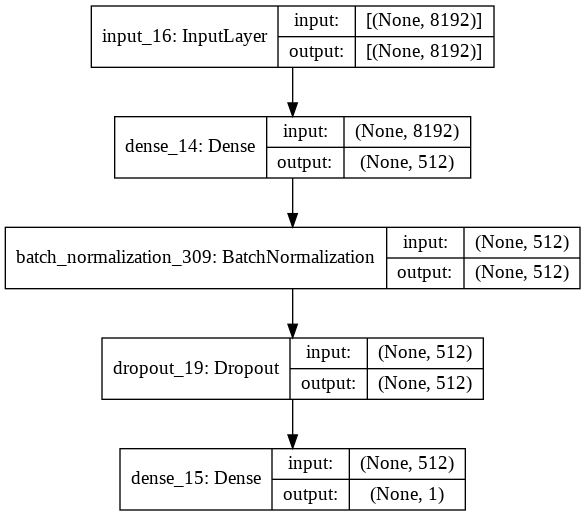

In [ ]:
######################################################################################     Image classifier model architecture   ####################################################################
from tensorflow.python.keras import Sequential
from keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D,  Flatten, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model

# ###### Part 1 - Initialising the CNN ------>
classifier_img = Sequential()

# ##### VGG without aug --------->
input_layer = mobilenet_model.output_shape[1]
classifier_img.add(InputLayer(input_shape=(input_layer,)))

# # ######  VGG with Aug --------->
# # classifier_img.add(vgg_model)

# ###### Full Connection ->
classifier_img.add(Dense(units = 512, activation = 'relu',input_dim = input_layer))
classifier_img.add(BatchNormalization())
classifier_img.add(Dropout(0.5))
classifier_img.add(Dense(units = 1, activation = 'sigmoid'))

classifier_img.summary()
plot_model(classifier_img, to_file='classifier_img_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/15
10/10 [==============================] - 1s 51ms/step - loss: 1.0991 - accuracy: 0.4922 - val_loss: 2.6598 - val_accuracy: 0.4028
Epoch 2/15
10/10 [==============================] - 0s 31ms/step - loss: 0.6575 - accuracy: 0.7066 - val_loss: 1.6364 - val_accuracy: 0.5640
Epoch 3/15
10/10 [==============================] - 0s 30ms/step - loss: 0.4599 - accuracy: 0.7692 - val_loss: 1.5242 - val_accuracy: 0.4976
Epoch 4/15
10/10 [==============================] - 0s 30ms/step - loss: 0.3386 - accuracy: 0.8482 - val_loss: 0.9915 - val_accuracy: 0.6398
Epoch 5/15
10/10 [==============================] - 0s 30ms/step - loss: 0.2913 - accuracy: 0.8907 - val_loss: 1.0095 - val_accuracy: 0.6066
Epoch 6/15
10/10 [==============================] - 0s 30ms/step - loss: 0.2366 - accuracy: 0.9326 - val_loss: 0.9069 - val_accuracy: 0.6445
Epoch 7/15
10/10 [==============================] - 0s 31ms/step - loss: 0.1928 - accuracy: 0.9576 - val_loss: 0.7580 - val_accuracy: 0.7014
Epoch 8/15
10

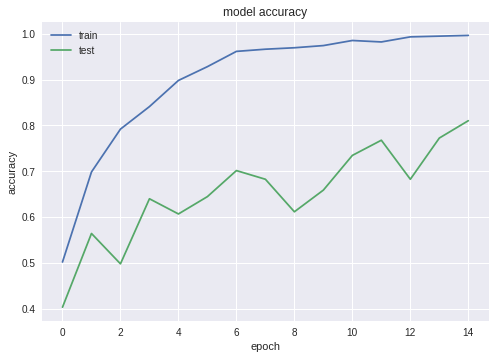

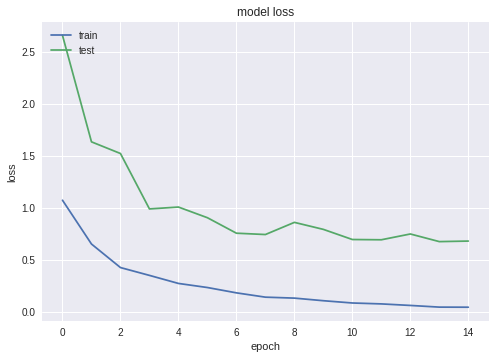

In [ ]:
###########################################################################    Training of VGG16 over Images    #########################################################
classifier_img.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history1 = classifier_img.fit(train_feat_mobilenet,Y_train,batch_size=64,epochs=15,verbose=1,validation_data=(val_feat_mobilenet,Y_val))  ############# testing epochs =2

##################### list all data in history
print(history1.history.keys())
##################### summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('A2 vgg16 acc.png')
plt.show()
###################### summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('A2 vgg16 loss.png')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Y_pred_img = classifier_img.predict_classes(test_feat_mobilenet)
# Y_pred_prob_img = classifier_text.predict_proba(test_feat_vgg)

cm_img = confusion_matrix(Y_test,Y_pred_img)
print(cm_img)
print("\n")
accuracy_img = accuracy_score(Y_test, Y_pred_img)
print('Accuracy: %f' % accuracy_img)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[ 11  22]
 [ 11 167]]


Accuracy: 0.843602


In [ ]:
###################        Save Image Model      ####################
classifier_img.save("classifier_img.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from keras.models import load_model
 
# load model
classifier_img = load_model('classifier_img.h5')
# summarize model.
print(classifier_img.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               4194816   
_________________________________________________________________
batch_normalization_309 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 513       
Total params: 4,197,377
Trainable params: 4,196,353
Non-trainable params: 1,024
_________________________________________________________________
None


In [ ]:
#################################################   Blue Cnf matrix  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm1, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]),
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]),
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[ 11  22]
 [ 11 167]]


Accuracy: 0.843602


              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

roc_auc_score = 0.6357677902621723


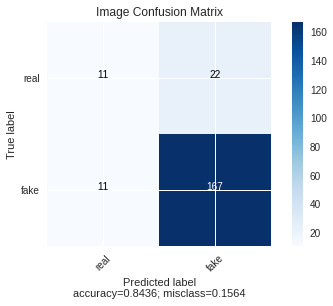

<Figure size 576x396 with 0 Axes>

In [ ]:
###################################################   Results of VGG16 over Images    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_img = classifier_img.predict_classes(test_feat_mobilenet)
Y_pred_prob_img = classifier_img.predict_proba(test_feat_mobilenet)
cm_img = confusion_matrix(Y_test,Y_pred_img)
print(cm_img)
print("\n")
accuracy_img = accuracy_score(Y_test, Y_pred_img)
print('Accuracy: %f' % accuracy_img)
print("\n")

classreport_img = classification_report(Y_test, Y_pred_img)
print(classreport_img)
print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_img, average='macro'))

plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title = "Image Confusion Matrix")
plt.savefig('A2 VGG16 cm.png')

In [ ]:
########################################  Prediction Probabilities of Image  #####################################################
#Y_pred_prob_img = classifier_img.predict(X_test_img)
Y_pred_prob_img = Y_pred_prob_img.round()
print(len(Y_pred_prob_img))
print(type(Y_pred_prob_img))
print(np.array(Y_pred_prob_img).shape)
print(Y_pred_prob_img[0:10])

211
<class 'numpy.ndarray'>
(211, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]


No Skill: ROC AUC=0.500
VGG16: ROC AUC=0.636


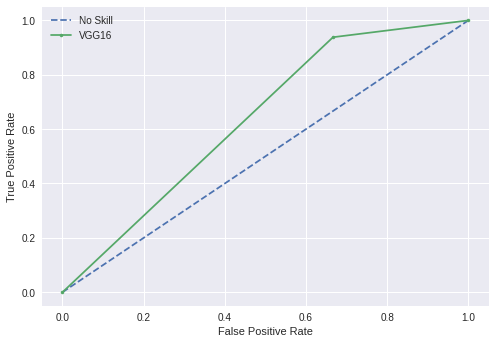

In [ ]:
###################################################   ROC for Images    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_img
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('VGG16: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='VGG16')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# # retrieve just the probabilities for the positive class
# pos_probs = Y_pred_img[:, 1]
# # plot no skill roc curve
# pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# # calculate roc curve for model
# fpr, tpr, _ = roc_curve(Y_test, pos_probs)
# # plot model roc curve
# pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

# Text

In [ ]:
#<----------------------------------------------------------------------------------------------------    TEXT  CLASSIFIER   --------------------------------------------------------------------------------------------------------->

In [ ]:
#########################################     Extracting text data from final train and test dataset     #######################################
X_train_text = []
X_val_text = []
X_test_text = []

for i in range(len(X_train)):
  temp1 = X_train[i][1].tolist()
  X_train_text.append(temp1)
  
for i in range(len(X_val)):
  temp1 = X_val[i][1].tolist()
  X_val_text.append(temp1)

for i in range(len(X_test)):
  temp1 = X_test[i][1].tolist()
  X_test_text.append(temp1)

In [ ]:
print("<-------X train------->")
print(type(X_train_text))
X_train_text = np.array(X_train_text)
print(type(X_train_text))
print(np.array(X_train_text).shape)
print(len(X_train_text))
print("<-------X test------->")
print(type(X_test_text))
X_test_text = np.array(X_test_text)
print(type(X_test_text))
print(np.array(X_test_text).shape)
print(len(X_test_text))
print("<-------X val------->")
print(type(X_val_text))
X_val_text = np.array(X_val_text)
print(type(X_val_text))
print(np.array(X_val_text).shape)
print(len(X_val_text))
print("\n")
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(630, 200)
630
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(211, 200)
211
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(211, 200)
211


<-------Y train------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(630,)
630
<-------Y test------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(211,)
211
<-------Y val------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(211,)
211


In [ ]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [ ]:
#from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
#from keras.models import Sequential
#from keras.utils import Sequence
#from keras.layers import CuDNNLSTM

In [ ]:
# ####################################################################################     Bi-LSTM model architecture for text     ###################################################################

from keras.layers import Dense, Input, LSTM, Embedding, Dropout,SpatialDropout1D, Bidirectional
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model

max_words = 1000
max_len = 300

classifier_text = Sequential()
classifier_text.add(Embedding(max_words,50,input_length=max_len))
classifier_text.add(Bidirectional(LSTM(64)))
classifier_text.add(Dense(256,name='FC1'))
classifier_text.add(BatchNormalization())
classifier_text.add(Activation('relu'))
classifier_text.add(Dropout(0.5))
classifier_text.add(Dense(1,name='out_layer'))
#classifier_title.add(BatchNormalization())
classifier_text.add(Activation('sigmoid'))

classifier_text.summary()

##############################################################     Bi-LSTM model for title     ###############################################

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 50)           50000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               58880     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
batch_normalization_97 (Batc (None, 256)               1024      
_________________________________________________________________
activation_97 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

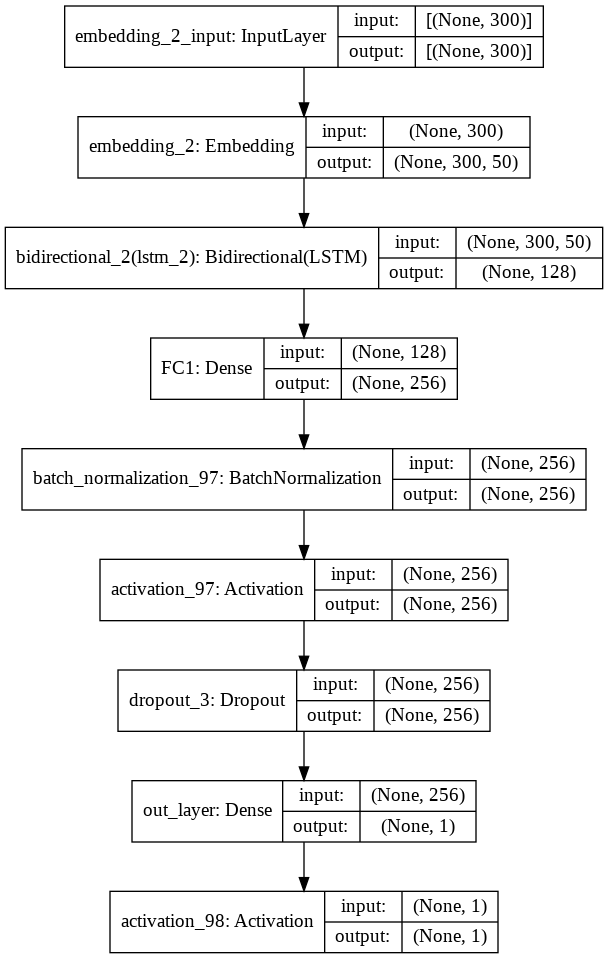

In [ ]:
plot_model(classifier_text, to_file='classifier_text_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
##################################################################################      Training Bi-LSTM model over text      #################################################################
classifier_text.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#history2 = classifier_text.fit(X_train_text,Y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_test_text,Y_test))     ###########  validation on test set
history2 = classifier_text.fit(X_train_text,Y_train,batch_size=64,epochs=15,verbose=1,validation_data=(X_val_text,Y_val))                   ###########  validation on a subset of training set 

# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/15


InvalidArgumentError: ignored

In [ ]:
###################        Save Model      ####################
classifier_text.save("classifier_text.h5")
print("Saved model to disk")

Saved model to disk


[[108  37]
 [ 27 182]]


Accuracy: 0.819209


              precision    recall  f1-score   support

           0       0.80      0.74      0.77       145
           1       0.83      0.87      0.85       209

    accuracy                           0.82       354
   macro avg       0.82      0.81      0.81       354
weighted avg       0.82      0.82      0.82       354

roc_auc_score = 0.8078204916680415


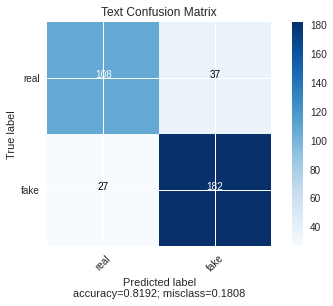

In [ ]:
######################################################   Results of Bi-LSTM over text    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_text = classifier_text.predict(X_test_text)
#Y_pred_prob_text = classifier_text.predict_proba(X_test_text)

cm_text=confusion_matrix(Y_test,Y_pred_text.round())
print(cm_text)

print("\n")
accuracy_text = accuracy_score(Y_test, Y_pred_text.round())
print('Accuracy: %f' % accuracy_text)
print("\n")

classreport_text = classification_report(Y_test, Y_pred_text.round())
print(classreport_text)

print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_text.round(), average='macro'))
plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")

In [ ]:
##############################################  Prediction Probabilities of Text  #####################################################
Y_pred_prob_text = classifier_text.predict(X_test_text)
print(len(Y_pred_prob_text))
print(type(Y_pred_prob_text))
print(np.array(Y_pred_prob_text).shape)
print(Y_pred_prob_text[0:5])

354
<class 'numpy.ndarray'>
(354, 1)
[[1.6915974e-04]
 [9.9820256e-01]
 [9.9564123e-01]
 [7.9354942e-01]
 [6.7070243e-05]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.808


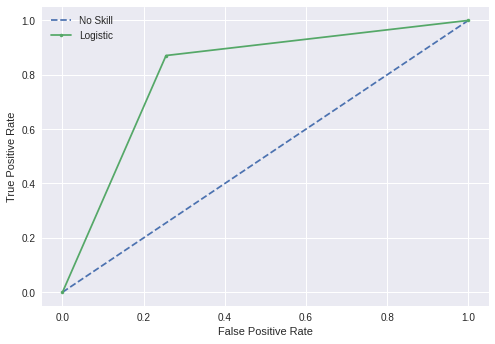

In [ ]:
###################################################   ROC for Text    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_text.round()
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print(Y_pred_text[0])

[0.00016916]


# Title

In [ ]:
#<------------------------------------------------------------------------------------------------------    TITLE  CLASSIFIER  -------------------------------------------------------------------------------------------------------->

In [ ]:
#######################################################################   Extracting Title from final dataset  ###############################################################
X_train_title = []
X_val_title = []
X_test_title = []

for i in range(len(X_train)):
  temp1 = X_train[i][2].tolist()
  X_train_title.append(temp1)
  
for i in range(len(X_val)):
  temp1 = X_val[i][2].tolist()
  X_val_title.append(temp1)

for i in range(len(X_test)):
  temp1 = X_test[i][2].tolist()
  X_test_title.append(temp1)

In [ ]:
print("<-------X train------->")
print(type(X_train_title))
X_train_title = np.array(X_train_title)
print(type(X_train_title))
print(np.array(X_train_title).shape)
print(len(X_train_title))
print("<-------X test------->")
print(type(X_test_title))
X_test_title = np.array(X_test_title)
print(type(X_test_title))
print(np.array(X_test_title).shape)
print(len(X_test_title))
print("<-------X val------->")
print(type(X_val_title))
X_val_title = np.array(X_val_title)
print(type(X_val_title))
print(np.array(X_val_title).shape)
print(len(X_val_title))
print("\n")
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(630, 300)
630
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(211, 300)
211
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(211, 300)
211


<-------Y train------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(630,)
630
<-------Y test------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(211,)
211
<-------Y val------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(211,)
211


In [ ]:
##############################################################     Bi-LSTM model for title     ###############################################

from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model

max_words = 1000
max_len = 300

classifier_title = Sequential()
classifier_title.add(Embedding(max_words,50,input_length=max_len))
classifier_title.add(LSTM(64))
classifier_title.add(Dense(256,name='FC1'))
classifier_title.add(BatchNormalization())
classifier_title.add(Activation('relu'))
classifier_title.add(Dropout(0.5))
classifier_title.add(Dense(1,name='out_layer'))
#classifier_title.add(BatchNormalization())
classifier_title.add(Activation('sigmoid'))

classifier_title.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 50)           50000     
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
batch_normalization_310 (Bat (None, 256)               1024      
_________________________________________________________________
activation_305 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)               

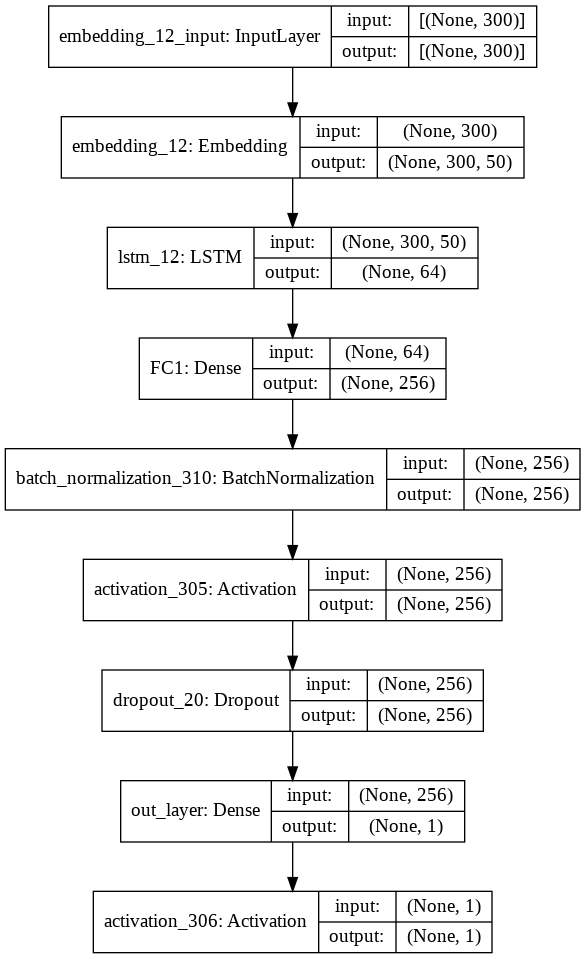

In [ ]:
plot_model(classifier_title, to_file='classifier_title_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/15
10/10 [==============================] - 5s 302ms/step - loss: 0.6546 - accuracy: 0.6321 - val_loss: 0.6154 - val_accuracy: 0.8436
Epoch 2/15
10/10 [==============================] - 2s 230ms/step - loss: 0.4175 - accuracy: 0.8655 - val_loss: 0.6080 - val_accuracy: 0.8436
Epoch 3/15
10/10 [==============================] - 2s 213ms/step - loss: 0.3613 - accuracy: 0.8584 - val_loss: 0.5912 - val_accuracy: 0.8436
Epoch 4/15
10/10 [==============================] - 2s 214ms/step - loss: 0.2540 - accuracy: 0.9110 - val_loss: 0.5373 - val_accuracy: 0.8436
Epoch 5/15
10/10 [==============================] - 2s 216ms/step - loss: 0.1501 - accuracy: 0.9486 - val_loss: 0.4670 - val_accuracy: 0.8436
Epoch 6/15
10/10 [==============================] - 2s 216ms/step - loss: 0.0808 - accuracy: 0.9819 - val_loss: 0.4906 - val_accuracy: 0.8436
Epoch 7/15
10/10 [==============================] - 2s 216ms/step - loss: 0.0462 - accuracy: 0.9974 - val_loss: 0.4812 - val_accuracy: 0.8436
Epoch 

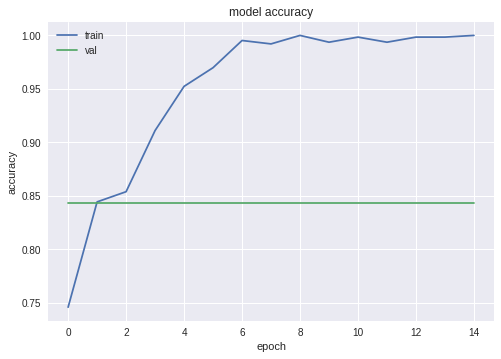

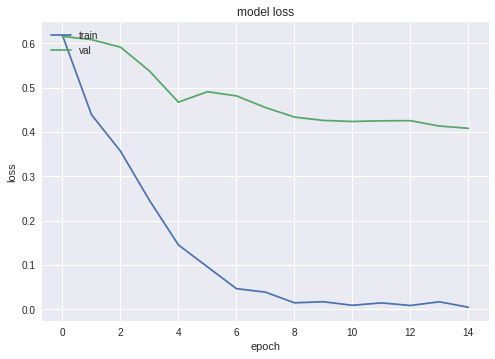

In [ ]:
#################################################################################      Training Bi-LSTM model over title     ########################################################################
classifier_title.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#history3 = classifier_title.fit(X_train_title,Y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_test_title,Y_test))     ###########  validation on test set
history3 = classifier_title.fit(X_train_title,Y_train,batch_size=64,epochs=15,verbose=1,validation_data=(X_val_title,Y_val))        ###########  validation on a subset of training set 

# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
###################        Save Model      ####################
classifier_title.save("classifier_title.h5")
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[  0  33]
 [  0 178]]


Accuracy: 0.843602


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.84      1.00      0.92       178

    accuracy                           0.84       211
   macro avg       0.42      0.50      0.46       211
weighted avg       0.71      0.84      0.77       211

roc_auc_score = 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


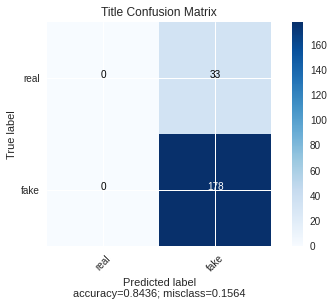

In [ ]:
######################################################   Results of Bi-LSTM over title    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_title = classifier_title.predict_classes(X_test_title)
Y_pred_prob_title = classifier_title.predict_proba(X_test_title)

cm_title=confusion_matrix(Y_test,Y_pred_title)
print(cm_title)

print("\n")
accuracy_title = accuracy_score(Y_test, Y_pred_title)
print('Accuracy: %f' % accuracy_title)
print("\n")

classreport_title = classification_report(Y_test, Y_pred_title)
print(classreport_title)

print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_title, average='macro'))

plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title = "Title Confusion Matrix")

In [ ]:
##################################################  Prediction Probabilities of Title  #####################################################
print(len(Y_pred_prob_title))
print(type(Y_pred_prob_title))
print(np.array(Y_pred_prob_title).shape)
print(Y_pred_prob_title[0:5])

211
<class 'numpy.ndarray'>
(211, 1)
[[0.88820547]
 [0.9053826 ]
 [0.85790503]
 [0.92617327]
 [0.7888591 ]]


No Skill: ROC AUC=0.500
Bi_LSTM for title: ROC AUC=0.500


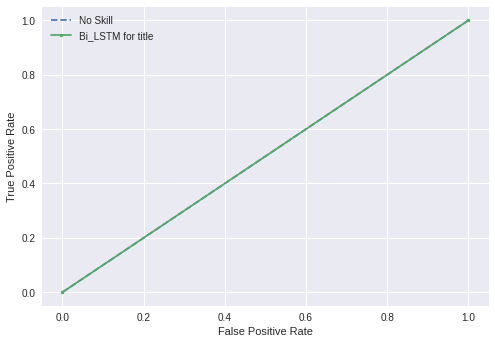

In [ ]:
###################################################   ROC for Title    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_title
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Bi_LSTM for title: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Bi_LSTM for title')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#**Average**

In [ ]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion():
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = (Y_pred_prob_img[i] + Y_pred_prob_title[i])/2
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  #print("Image_weight = ",w1)
  #print("Text_weight = ",w2)
  #print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048


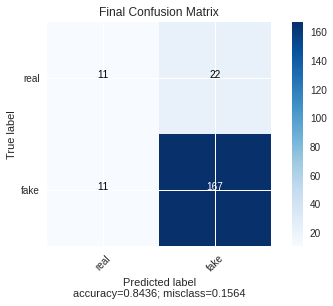

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


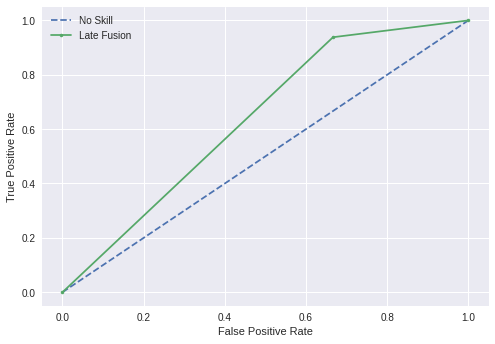

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion()
final_roc(Final_prediction)

#**Sum**

In [ ]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion():
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = (Y_pred_prob_img[i] + Y_pred_prob_title[i])
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  #print("Image_weight = ",w1)
  #print("Text_weight = ",w2)
  #print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

[[  0  33]
 [  0 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.84      1.00      0.92       178

    accuracy                           0.84       211
   macro avg       0.42      0.50      0.46       211
weighted avg       0.71      0.84      0.77       211

Accuracy: 0.843602
roc_auc_score = 0.5
f1_score = 0.45758354755784064


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


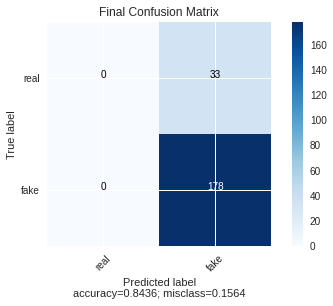

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.500


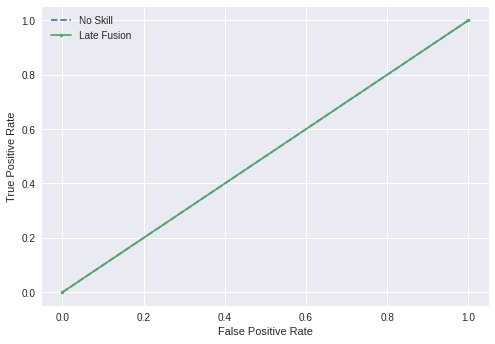

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion()
final_roc(Final_prediction)

#**Max**

In [ ]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion():
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = max(Y_pred_prob_img[i], Y_pred_prob_title[i])
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  #print("Image_weight = ",w1)
  #print("Text_weight = ",w2)
  #print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

[[  0  33]
 [  0 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.84      1.00      0.92       178

    accuracy                           0.84       211
   macro avg       0.42      0.50      0.46       211
weighted avg       0.71      0.84      0.77       211

Accuracy: 0.843602
roc_auc_score = 0.5
f1_score = 0.45758354755784064


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


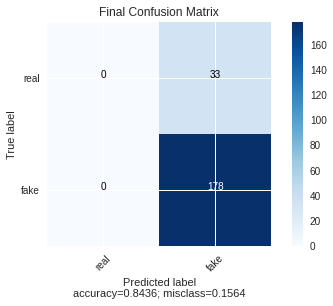

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.500


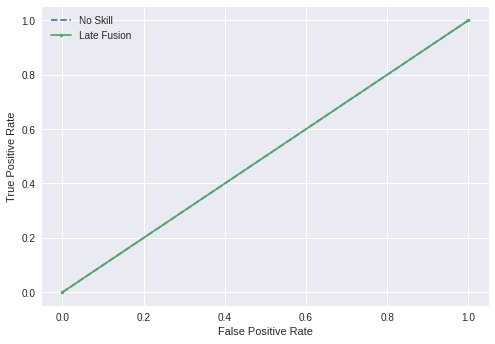

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion()
final_roc(Final_prediction)

#**Other Combinations**

In [ ]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion(w1,w2):
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_title[i]*w2)/(w1+w2)
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  print("Image_weight = ",w1)
  print("Text_weight = ",w2)
  #print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.55
Text_weight =  0.45


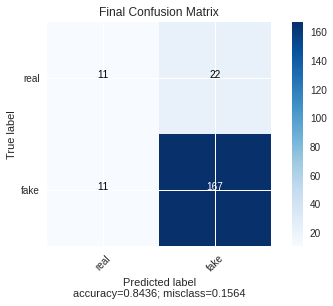

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


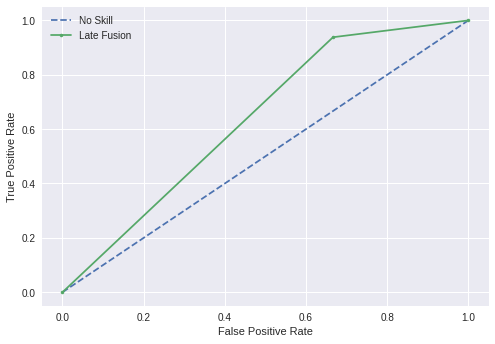

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.55,0.45)
final_roc(Final_prediction)

[[ 11  22]
 [  9 169]]
              precision    recall  f1-score   support

           0       0.55      0.33      0.42        33
           1       0.88      0.95      0.92       178

    accuracy                           0.85       211
   macro avg       0.72      0.64      0.67       211
weighted avg       0.83      0.85      0.84       211

Accuracy: 0.853081
roc_auc_score = 0.6413857677902621
f1_score = 0.6655417497571202
Image_weight =  0.45
Text_weight =  0.55


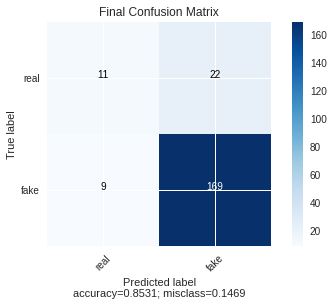

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.641


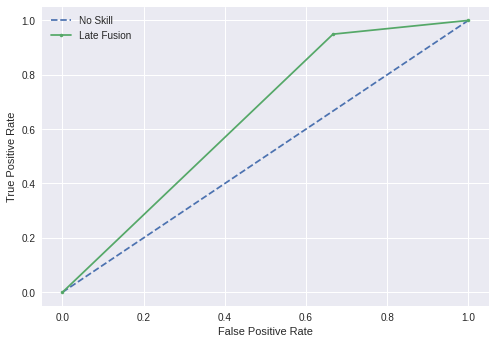

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.45,0.55)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.5
Text_weight =  0.5


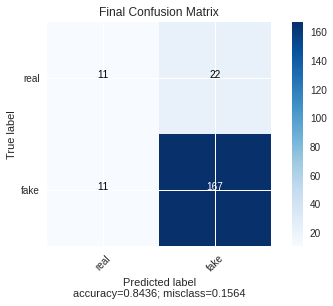

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


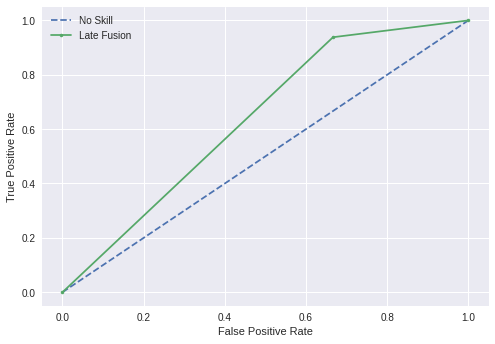

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.5,0.5)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.7
Text_weight =  0.3


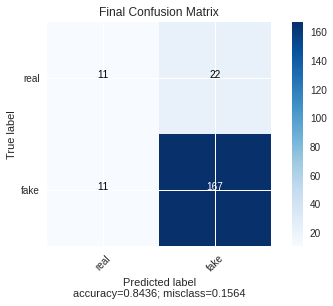

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


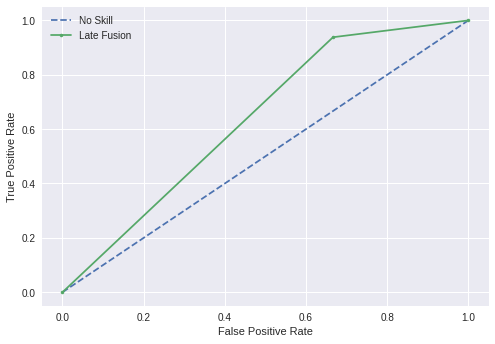

In [ ]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.7,0.3)
final_roc(Final_prediction)

[[  0  33]
 [  0 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.84      1.00      0.92       178

    accuracy                           0.84       211
   macro avg       0.42      0.50      0.46       211
weighted avg       0.71      0.84      0.77       211

Accuracy: 0.843602
roc_auc_score = 0.5
f1_score = 0.45758354755784064
Image_weight =  0.3
Text_weight =  0.7


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


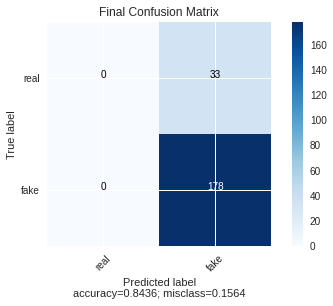

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.500


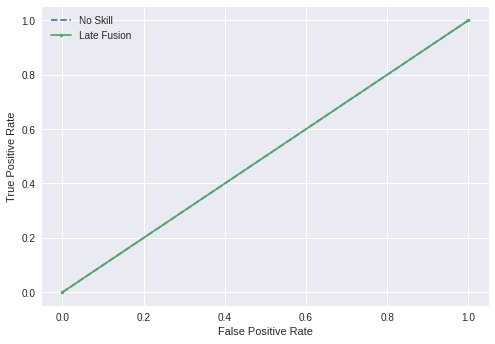

In [ ]:
# ##################################################    (b) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.3,0.7)
final_roc(Final_prediction)

[[  0  33]
 [  0 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.84      1.00      0.92       178

    accuracy                           0.84       211
   macro avg       0.42      0.50      0.46       211
weighted avg       0.71      0.84      0.77       211

Accuracy: 0.843602
roc_auc_score = 0.5
f1_score = 0.45758354755784064
Image_weight =  0.2
Text_weight =  0.8


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


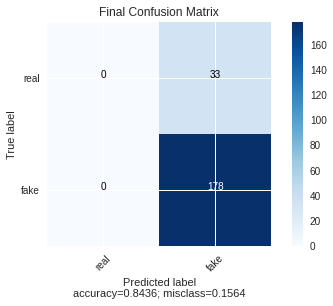

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.500


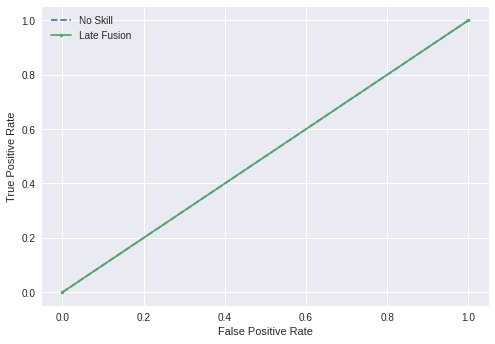

In [ ]:
# ##################################################    (c) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.2,0.8)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.8
Text_weight =  0.2


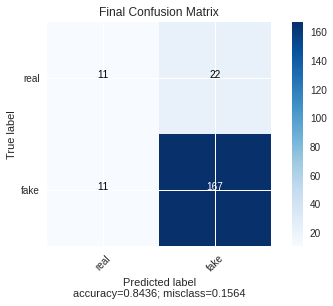

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


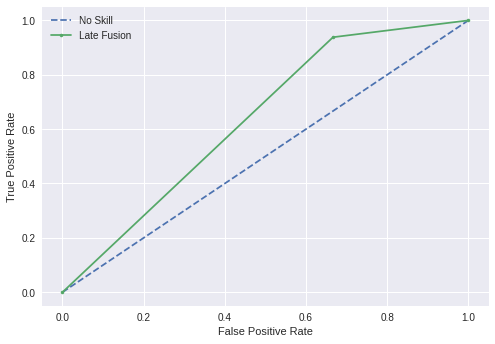

In [ ]:
# ##################################################    (d) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.8,0.2)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.6
Text_weight =  0.4


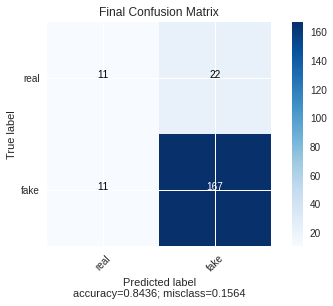

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


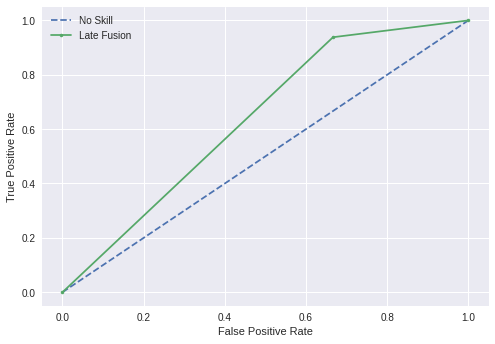

In [ ]:
# ##################################################    (e) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.6,0.4)
final_roc(Final_prediction)

[[  5  28]
 [  3 175]]
              precision    recall  f1-score   support

           0       0.62      0.15      0.24        33
           1       0.86      0.98      0.92       178

    accuracy                           0.85       211
   macro avg       0.74      0.57      0.58       211
weighted avg       0.82      0.85      0.81       211

Accuracy: 0.853081
roc_auc_score = 0.5673306094654409
f1_score = 0.5812688048140324
Image_weight =  0.4
Text_weight =  0.6


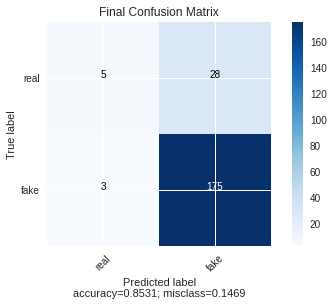

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.567


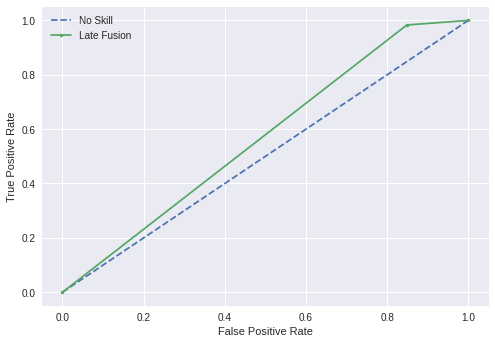

In [ ]:
# ##################################################    (f) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.4,0.6)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.75
Text_weight =  0.25


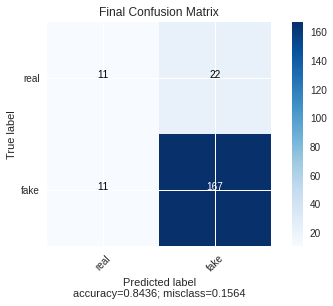

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


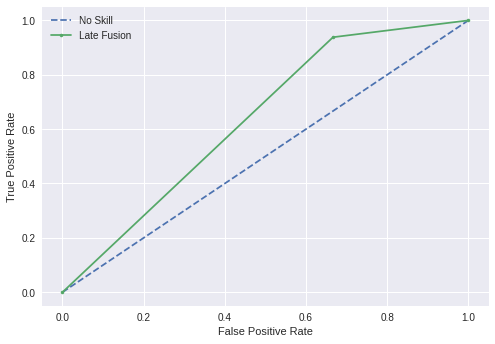

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.75,0.25)
final_roc(Final_prediction)

[[  0  33]
 [  0 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.84      1.00      0.92       178

    accuracy                           0.84       211
   macro avg       0.42      0.50      0.46       211
weighted avg       0.71      0.84      0.77       211

Accuracy: 0.843602
roc_auc_score = 0.5
f1_score = 0.45758354755784064
Image_weight =  0.25
Text_weight =  0.75


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


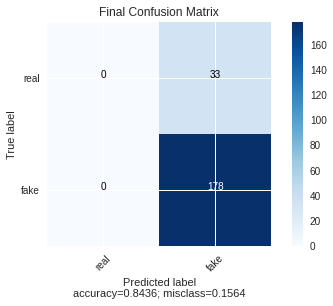

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.500


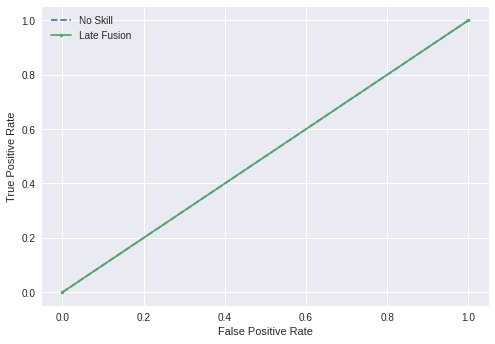

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.25,0.75)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.65
Text_weight =  0.35


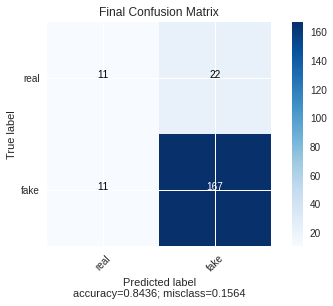

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


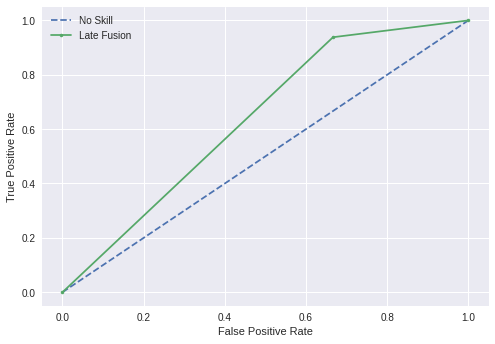

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.65,0.35)
final_roc(Final_prediction)

[[  3  30]
 [  1 177]]
              precision    recall  f1-score   support

           0       0.75      0.09      0.16        33
           1       0.86      0.99      0.92       178

    accuracy                           0.85       211
   macro avg       0.80      0.54      0.54       211
weighted avg       0.84      0.85      0.80       211

Accuracy: 0.853081
roc_auc_score = 0.5426455566905005
f1_score = 0.5408213408213407
Image_weight =  0.35
Text_weight =  0.65


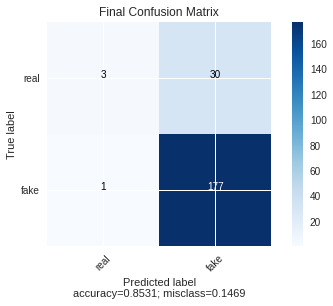

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.543


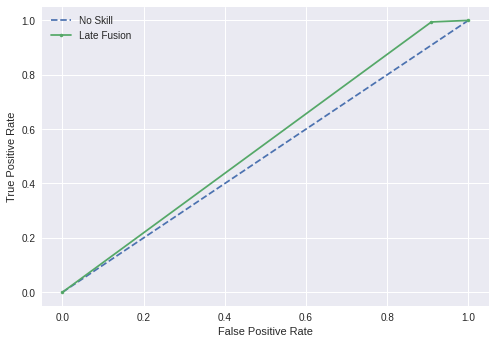

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.35,0.65)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.85
Text_weight =  0.15


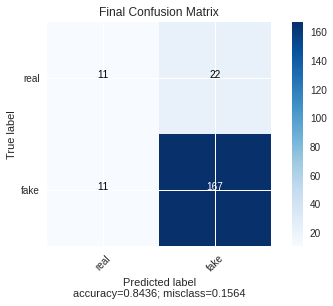

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


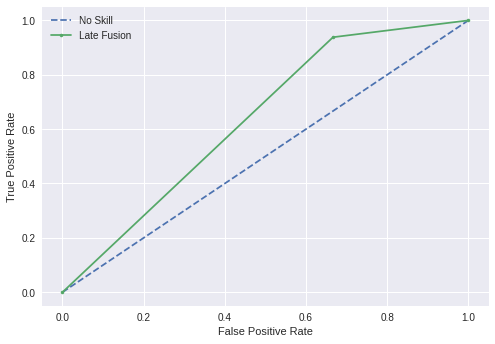

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.85,0.15)
final_roc(Final_prediction)

[[  0  33]
 [  0 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.84      1.00      0.92       178

    accuracy                           0.84       211
   macro avg       0.42      0.50      0.46       211
weighted avg       0.71      0.84      0.77       211

Accuracy: 0.843602
roc_auc_score = 0.5
f1_score = 0.45758354755784064
Image_weight =  0.15
Text_weight =  0.85


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


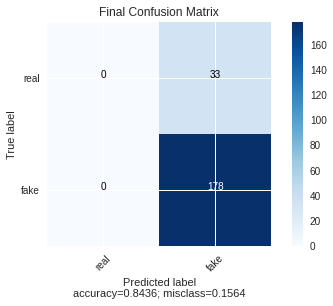

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.500


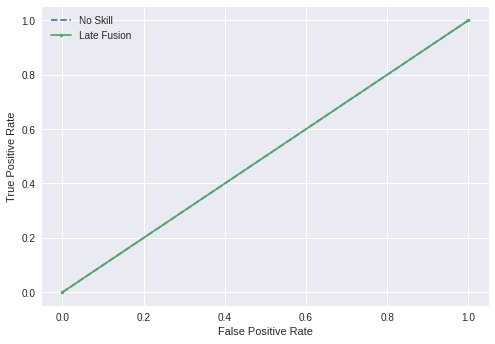

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.15,0.85)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.9
Text_weight =  0.1


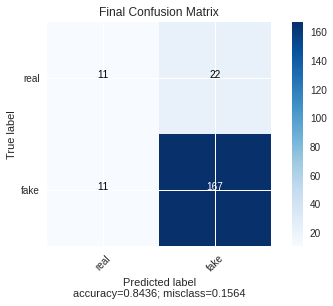

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


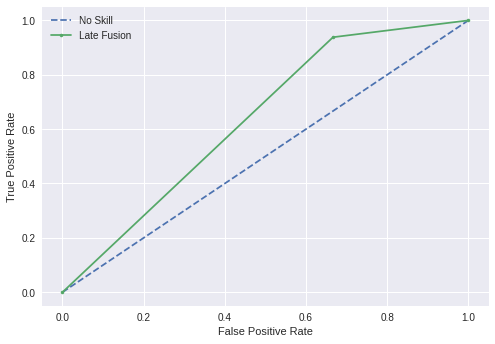

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.9,0.1)
final_roc(Final_prediction)

[[  0  33]
 [  0 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.84      1.00      0.92       178

    accuracy                           0.84       211
   macro avg       0.42      0.50      0.46       211
weighted avg       0.71      0.84      0.77       211

Accuracy: 0.843602
roc_auc_score = 0.5
f1_score = 0.45758354755784064
Image_weight =  0.1
Text_weight =  0.9


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


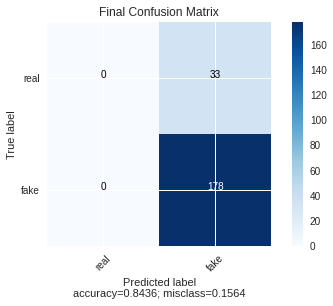

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.500


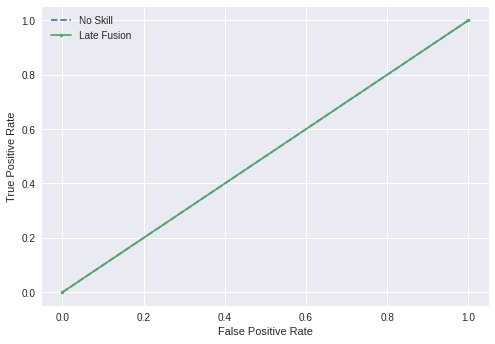

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.1,0.9)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.5
Text_weight =  0.5


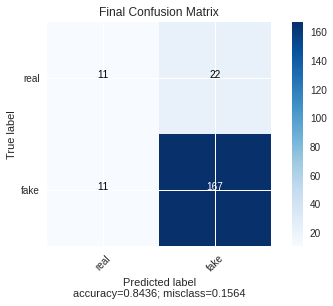

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


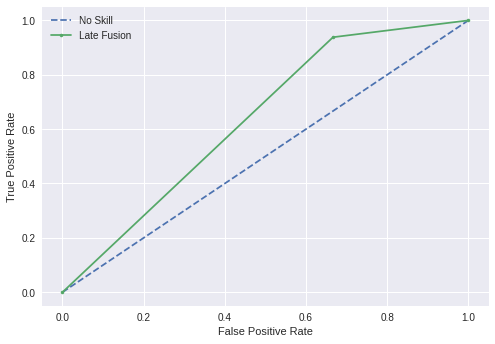

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.5,0.5)
final_roc(Final_prediction)

[[ 11  22]
 [  9 169]]
              precision    recall  f1-score   support

           0       0.55      0.33      0.42        33
           1       0.88      0.95      0.92       178

    accuracy                           0.85       211
   macro avg       0.72      0.64      0.67       211
weighted avg       0.83      0.85      0.84       211

Accuracy: 0.853081
roc_auc_score = 0.6413857677902621
f1_score = 0.6655417497571202
Image_weight =  0.45
Text_weight =  0.55


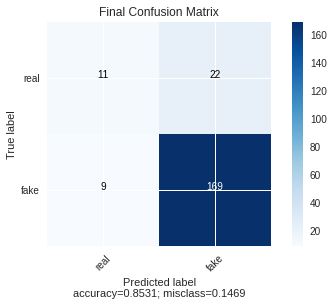

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.641


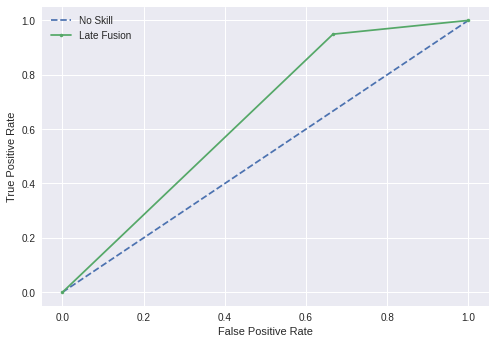

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.45,0.55)
final_roc(Final_prediction)

[[ 11  22]
 [ 11 167]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        33
           1       0.88      0.94      0.91       178

    accuracy                           0.84       211
   macro avg       0.69      0.64      0.66       211
weighted avg       0.82      0.84      0.83       211

Accuracy: 0.843602
roc_auc_score = 0.6357677902621723
f1_score = 0.6550408719346048
Image_weight =  0.55
Text_weight =  0.45


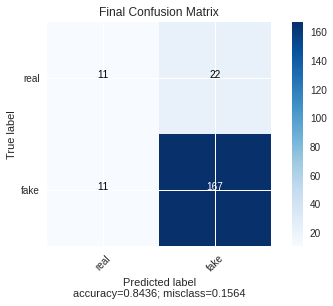

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.636


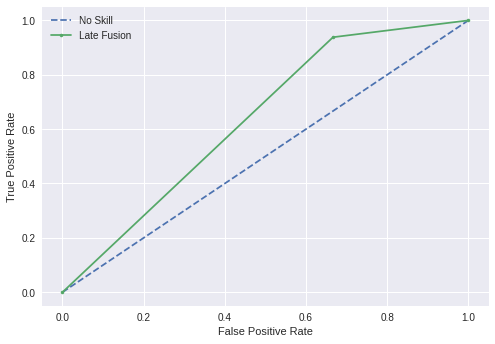

In [ ]:
# ##################################################    (g) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.55,0.45)
final_roc(Final_prediction)